<a href="https://colab.research.google.com/github/panpepson/Znaki-drogowe/blob/master/znaki_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pwd

'/content'

In [1]:
cd '/content/drive/My Drive/Colab Notebooks/DW-Matrix/'

/content/drive/My Drive/Colab Notebooks/DW-Matrix


In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/DW-Matrix'

In [0]:
GIT_TOKEN = '95d519e8c2482d7714f4fb584c1697b74691f02d'
GIT_URL='https://{0}@github.com/panpepson/Znaki-drogowe.git'.format(GIT_TOKEN)

In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/DW-Matrix'

In [0]:
!git clone $GIT_URL

Cloning into 'Znaki-drogowe'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [0]:
ls


bity2020/  HelloGithub.ipynb  mieszkania/  samochody2020/  Znaki-drogowe/
data/      KagleSerce/        README.md    serce01/        Znaki-Drogowe/
DW-rozne/  LICENSE            rzeka/       z20-1/


In [2]:
cd Znaki-drogowe/


/content/drive/My Drive/Colab Notebooks/DW-Matrix/Znaki-drogowe


In [0]:
mkdir data

In [0]:
cd data/

/content/drive/My Drive/Colab Notebooks/DW-Matrix/Znaki-drogowe/data


In [0]:
!curl -L http://bit.ly/train_road_sign -o train.p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0   1639      0 --:--:-- --:--:-- --:--:--  1639
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  102M  100  102M    0     0  17.3M      0  0:00:05  0:00:05 --:--:-- 27.1M


In [0]:
!curl -L http://bit.ly/dw_signnames -o signnames.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   147  100   147    0     0   3195      0 --:--:-- --:--:-- --:--:--  3195
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   986  100   986    0     0    936      0  0:00:01  0:00:01 --:--:--   936


In [0]:
!curl -L http://bit.ly/test_road_sign -o test.p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   140  100   140    0     0   2372      0 --:--:-- --:--:-- --:--:--  2372
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12.9M  100 12.9M    0     0  7500k      0  0:00:01  0:00:01 --:--:-- 25.4M


In [0]:
ls

signnames.csv  test.p  train.p


In [0]:
import pandas as pd

In [0]:
train = pd.read_pickle('train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [0]:
pd.read_csv('signnames.csv').sample(10)

a                                                  b
19  19                        Dangerous curve to the left
42  42  End of no passing by vehicles over 3.5 metric ...
0    0                               Speed limit (20km/h)
8    8                              Speed limit (120km/h)
16  16           Vehicles over 3.5 metric tons prohibited
26  26                                    Traffic signals
20  20                       Dangerous curve to the right
2    2                               Speed limit (50km/h)
11  11              Right-of-way at the next intersection
38  38                                         Keep right

In [0]:
# dzien2
# https://www.youtube.com/watch?v=tFLo-Pd-NI4
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [6]:
train = pd.read_pickle('data/train.p')
train.keys()


dict_keys(['coords', 'labels', 'features', 'sizes'])

In [7]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

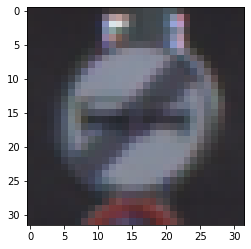

In [11]:
#RGB
#X_train[0] pixal reprezentowany przez 3 liczby rgb 
plt.imshow(X_train[110])


In [14]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

a                     b
0  0  Speed limit (20km/h)
1  1  Speed limit (30km/h)
2  2  Speed limit (50km/h)
3  3  Speed limit (60km/h)
4  4  Speed limit (70km/h)

In [18]:
dict_signs = signs.to_dict()['b']
dict_signs[30]

'Beware of ice/snow'

In [16]:
X_train[y_train==30].shape #sprawdzanie ile ejst znakow o id = 30

(390, 32, 32, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


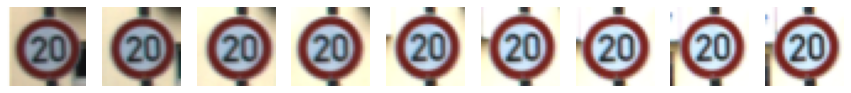

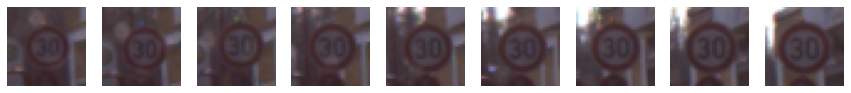

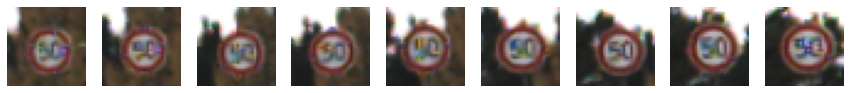

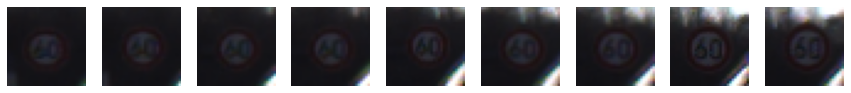

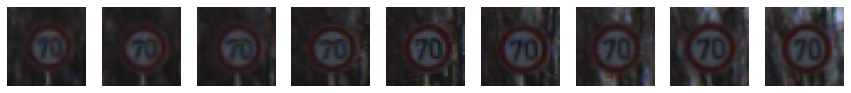

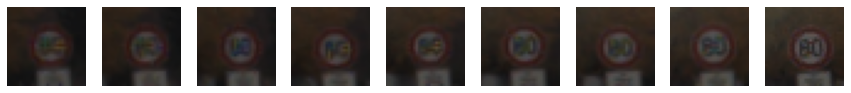

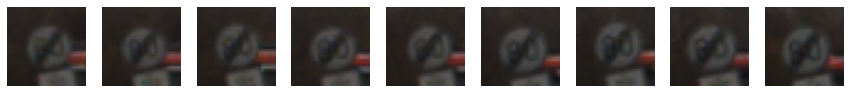

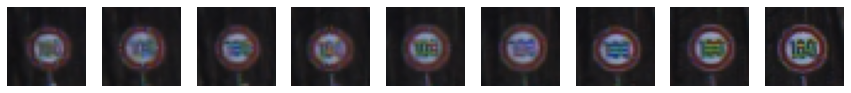

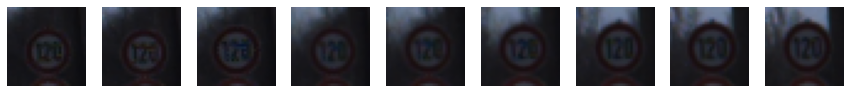

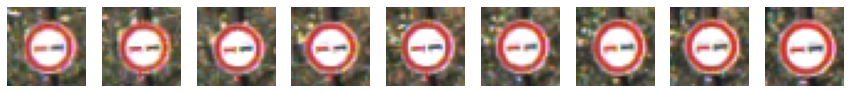

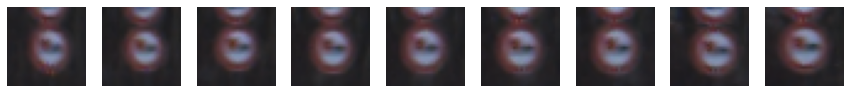

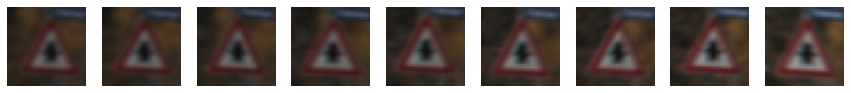

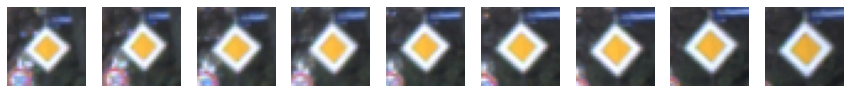

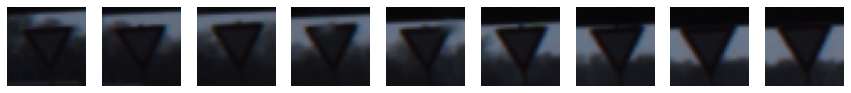

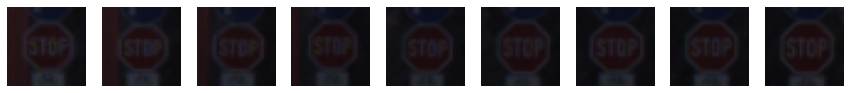

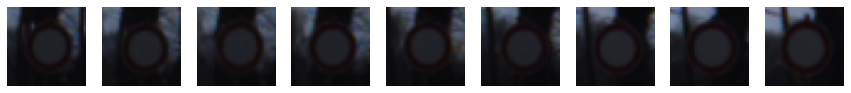

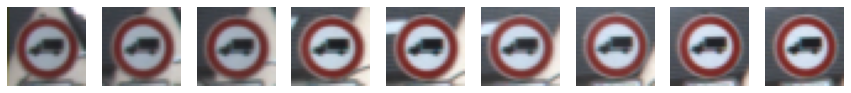

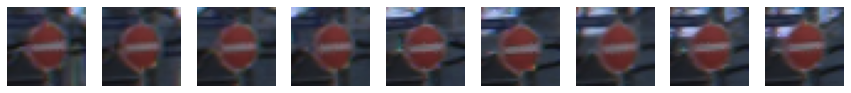

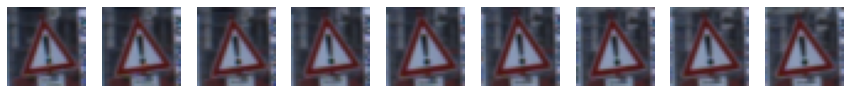

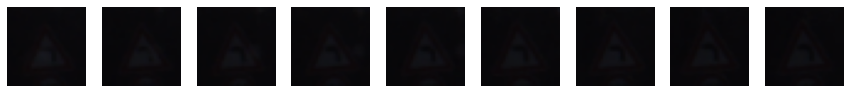

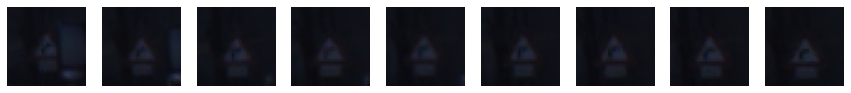

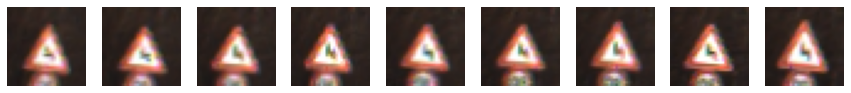

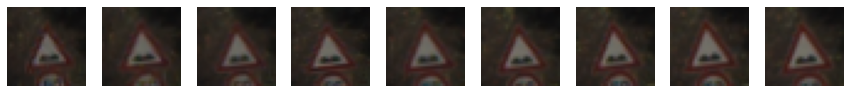

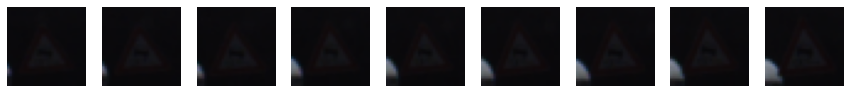

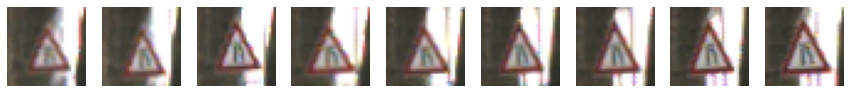

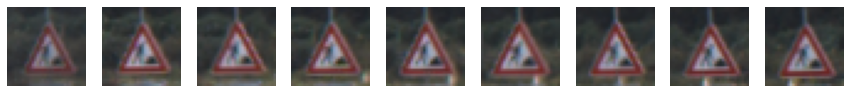

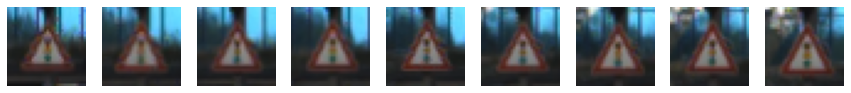

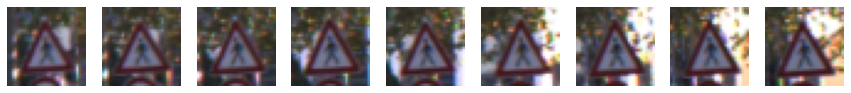

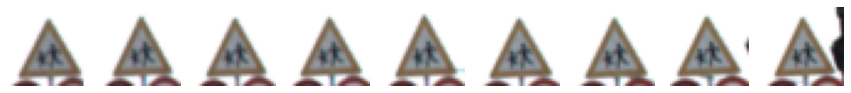

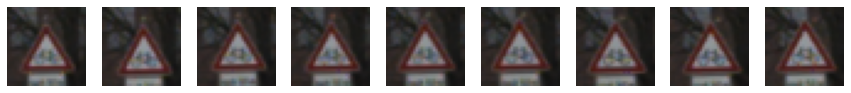

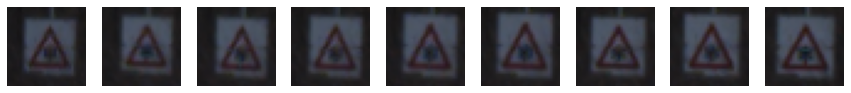

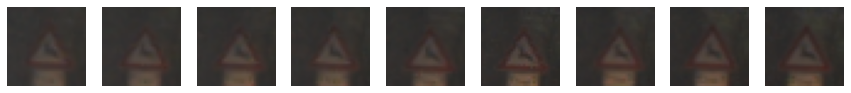

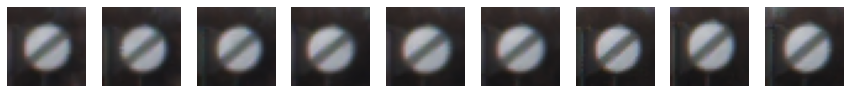

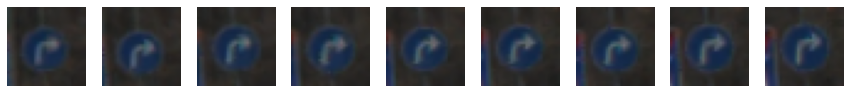

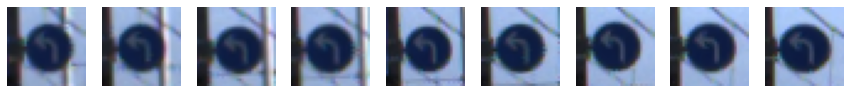

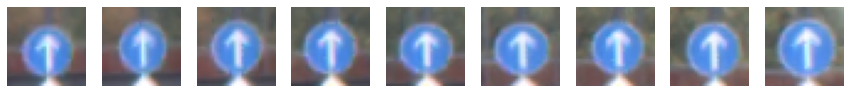

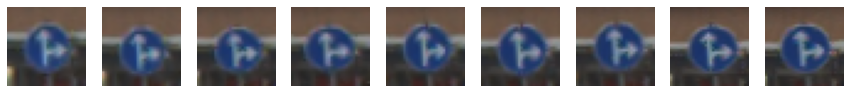

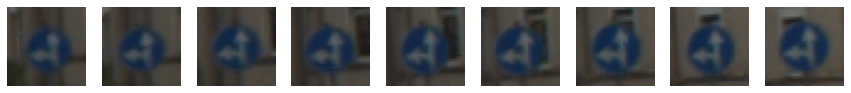

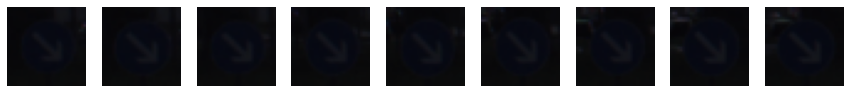

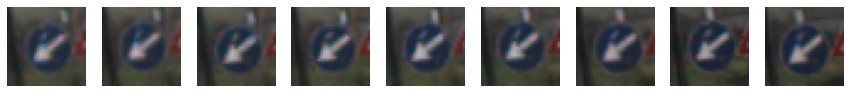

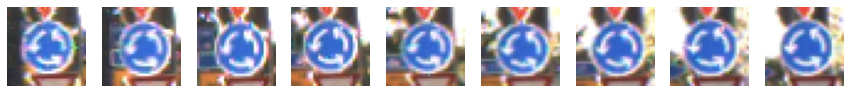

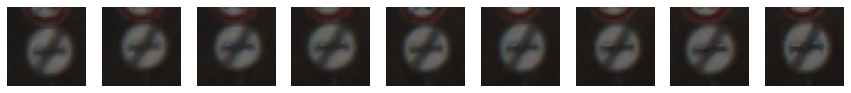

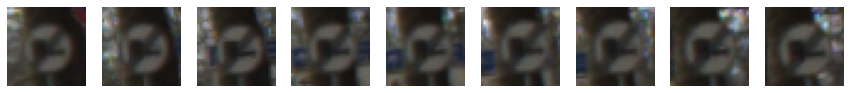

In [25]:
for id_sing in dict_signs.keys():
  given_signs = X_train[y_train == id_sing]

  plt.figure(figsize=(15,5)) 
  for i in range(9):
    plt.subplot('19{0}'.format(i+1))
    plt.imshow(given_signs[i])

    plt.axis('off')

plt.tight_layout
plt.show()

In [28]:
Counter(y_train).most_common() #ile ejst znakow o jakim id

[(2, 2010),
 (1, 1980),
 (13, 1920),
 (12, 1890),
 (38, 1860),
 (10, 1800),
 (4, 1770),
 (5, 1650),
 (25, 1350),
 (9, 1320),
 (7, 1290),
 (3, 1260),
 (8, 1260),
 (11, 1170),
 (35, 1080),
 (18, 1080),
 (17, 990),
 (31, 690),
 (14, 690),
 (33, 599),
 (26, 540),
 (15, 540),
 (28, 480),
 (23, 450),
 (30, 390),
 (16, 360),
 (34, 360),
 (6, 360),
 (36, 330),
 (22, 330),
 (40, 300),
 (20, 300),
 (39, 270),
 (21, 270),
 (29, 240),
 (24, 240),
 (41, 210),
 (42, 210),
 (32, 210),
 (27, 210),
 (37, 180),
 (19, 180),
 (0, 180)]

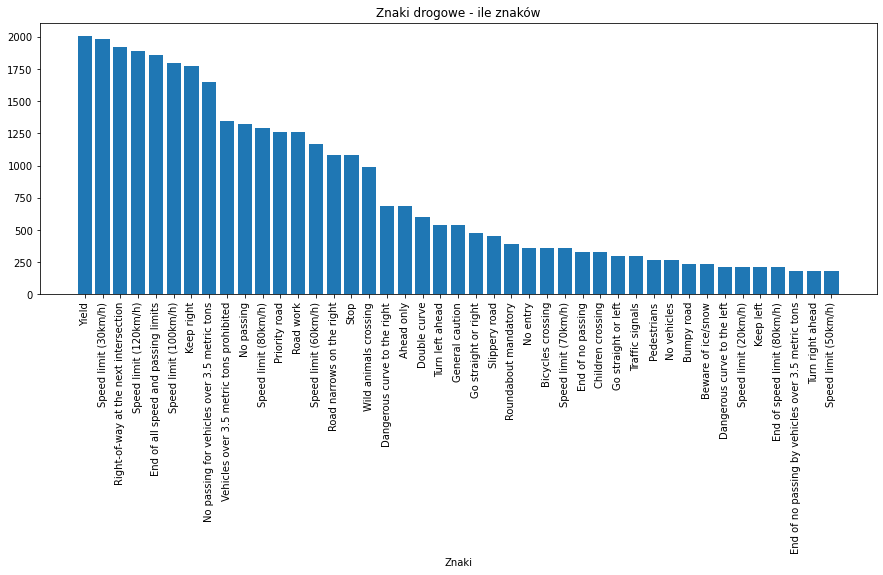

In [35]:
cnt = Counter(y_train).most_common() # rozbicie listy na dwie kolumny
id_labels, cnt_labels = zip(*cnt)
ids = range(len(id_labels))

plt.figure(figsize=(15,5))
plt.bar(ids, cnt_labels)

plt.xlabel('Znaki')
labels = [dict_signs[id_labels[id_]] for id_ in id_labels]
plt.xticks(ids, labels, rotation='vertical')

plt.title('Znaki drogowe - ile znaków')
plt.show()